# Visualization and Classification of Pokemons

This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.

This are the raw attributes that are used for calculating how much damage an attack will do in the games. This dataset is about the pokemon games

Attributes of data:

* #: ID for each pokemon
* Name: Name of each pokemon
* Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
* Type 2: Some pokemon are dual type and have 2
* Total: sum of all stats that come after this, a general guide to how strong a pokemon is
* HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
* Attack: the base modifier for normal attacks (eg. Scratch, Punch)
* Defense: the base damage resistance against normal attacks
* SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
* SP Def: the base damage resistance against special attacks
* Speed: determines which pokemon attacks first each round
* The data for this table has been acquired from several different sites, including:
    * pokemon.com
    * pokemondb
    * bulbapeida

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

data = pd.read_csv('Pokemon.csv')

In [2]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
data.shape

(800, 13)

In [4]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [5]:
data.isnull().values.any()

True

In [20]:
type_to_int_dict = { 'Grass': 0, 'Fire': 1, 'Water': 2, 'Bug': 3, 'Normal': 4, 
                    'Poison': 5, 'Electric': 6, 'Ground': 7, 'Fairy': 8, 'Fighting': 9,
                    'Psychic' : 10, 'Rock': 11, 'Ghost':12, 'Ice' : 13, 'Dragon': 14, 
                    'Dark': 15, 'Steel': 16, 'Flying': 17} 
        
data['Int_Type1'] = data['Type 1'].map(type_to_int_dict).astype(int)

In [28]:
import seaborn as sns
%matplotlib inline
#corr_matrix = data[["Type 1", "Type 2", "Total", "HP", "Attack", 
#                    "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]].corr()
corr_matrix = data[["Int_Type1", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Legendary"]].corr()

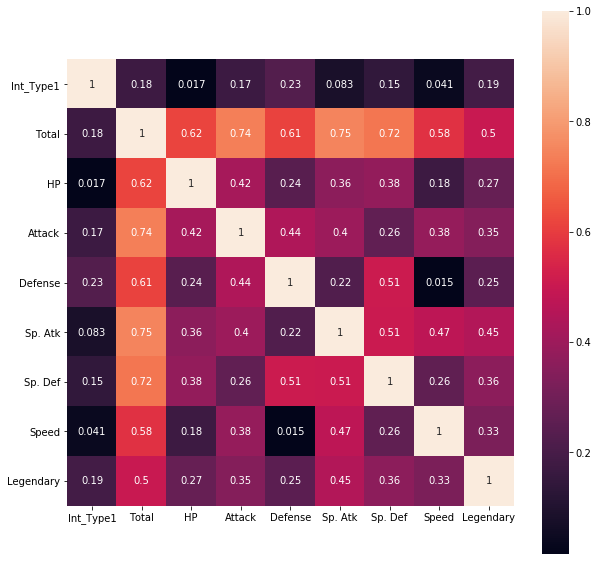

In [29]:
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sn.heatmap(corr_matrix, annot = True, square= True)

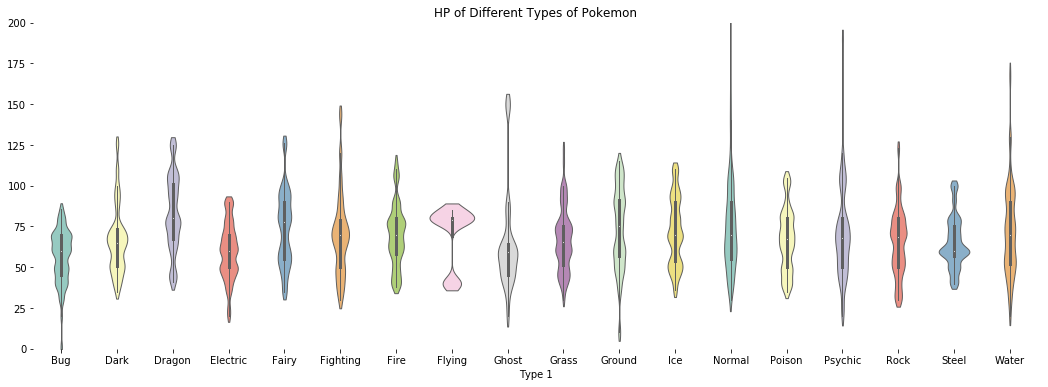

In [30]:
# distribution of HP among all types of pokemon
hp_data = data[['Name','Type 1','HP']]
hp_data = hp_data.pivot_table(values = 'HP',index = ['Name'],  columns = ['Type 1'])
hp_data.head()
f, ax = plt.subplots(figsize=(18, 6))
sns.violinplot(data=hp_data, palette="Set3", bw=.2, cut=1, linewidth=1)
ax.set(ylim=(0, 200))
ax.set_title("HP of Different Types of Pokemon")
sns.despine(left=True, bottom=True)

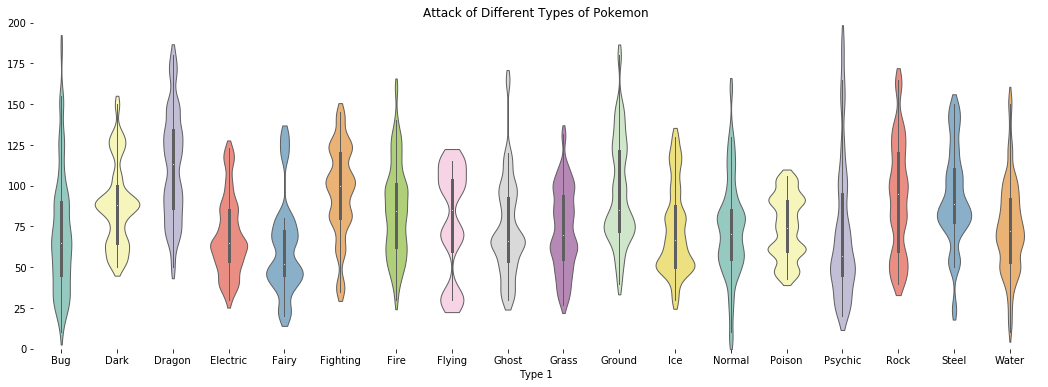

In [62]:
# distribution of HP among all types of pokemon
hp_data = data[['Name','Type 1','Attack']]
hp_data = hp_data.pivot_table(values = 'Attack',index = ['Name'],  columns = ['Type 1'])
hp_data.head()
f, ax = plt.subplots(figsize=(18, 6))
sns.violinplot(data=hp_data, palette="Set3", bw=.2, cut=1, linewidth=1)
ax.set(ylim=(0, 200))
ax.set_title("Attack of Different Types of Pokemon")
sns.despine(left=True, bottom=True)

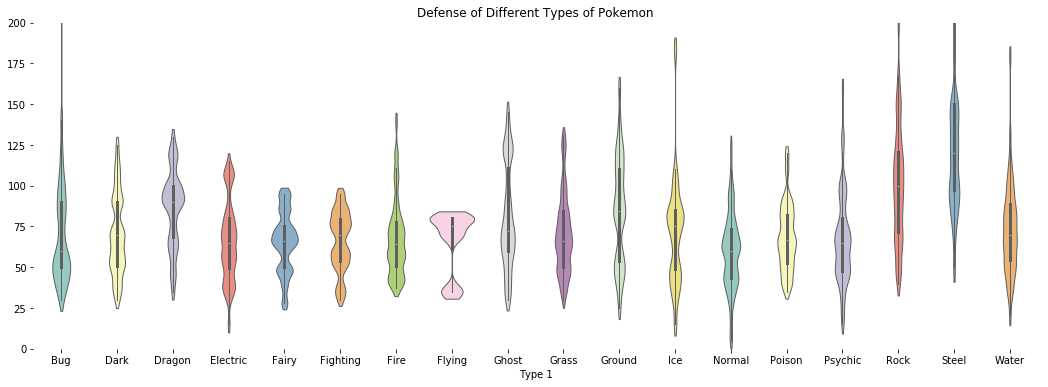

In [63]:
# distributionof Speed among all types of pokemon
hp_data = data[['Name','Type 1','Defense']]
hp_data = hp_data.pivot_table(values = 'Defense',index = ['Name'],  columns = ['Type 1'])
hp_data.head()
f, ax = plt.subplots(figsize=(18, 6))
sns.violinplot(data=hp_data, palette="Set3", bw=.2, cut=1, linewidth=1)
ax.set(ylim=(0, 200))
ax.set_title("Defense of Different Types of Pokemon")
sns.despine(left=True, bottom=True)

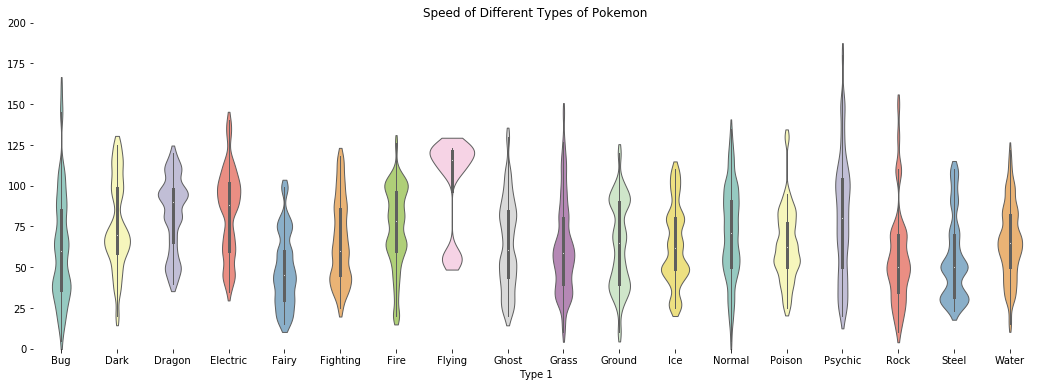

In [32]:
# distributionof Speed among all types of pokemon
hp_data = data[['Name','Type 1','Speed']]
hp_data = hp_data.pivot_table(values = 'Speed',index = ['Name'],  columns = ['Type 1'])
hp_data.head()
f, ax = plt.subplots(figsize=(18, 6))
sns.violinplot(data=hp_data, palette="Set3", bw=.2, cut=1, linewidth=1)
ax.set(ylim=(0, 200))
ax.set_title("Speed of Different Types of Pokemon")
sns.despine(left=True, bottom=True)

## Classification using SVM Classifier

* Test-train split and cross val score are implemented with F1 score as the metric

In [43]:
X = data.drop(['Name','Type 2', 'Total', 'Generation','Type 1','Legendary','Int_Type1'], axis = 1)
y = data['Int_Type1']
feature_cols = list(X)

from sklearn.cross_validation import train_test_split
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33,
                                                    random_state=10)

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(536, 7)
(536,)
(264, 7)
(264,)


In [46]:
from sklearn import svm

from sklearn import metrics

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [57]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')


0.15151515151515152

In [61]:
from sklearn.cross_validation import cross_val_score

clf_scores = cross_val_score(clf, X, y, cv=3, scoring='f1_micro')
print(clf_scores)
print('Avg F1 score:',clf_scores.mean())

[ 0.13919414  0.14606742  0.15384615]
Avg F1 score: 0.146369236257
